In [11]:
import os

In [12]:
#Inisialisasi neural network, bobot n bias

from random import seed
from random import random
 
def init_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
seed(1)
network = init_network(2, 1, 2)
for layer in network:
	print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


In [13]:
#directory

base_dir = './flowers/'
sunflower_dir = './flowers/sunflower/'
daisy_dir = './flowers/daisy/'
dandelion_dir = './flowers/dandelion/'

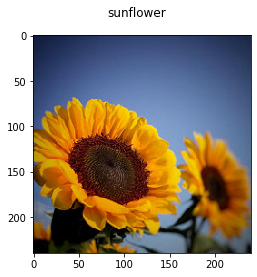

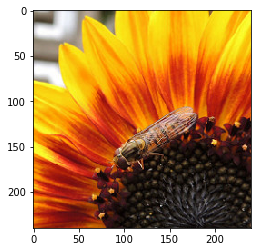

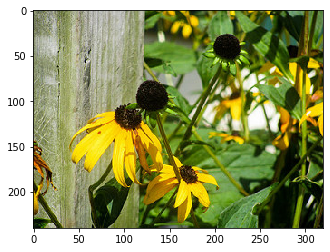

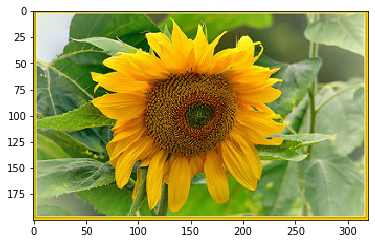

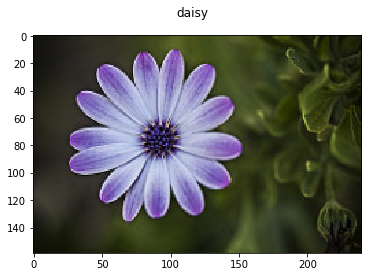

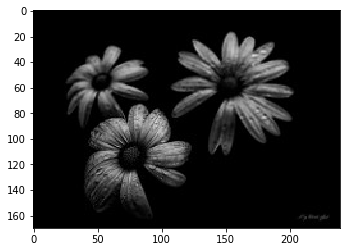

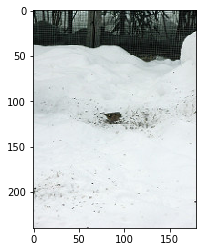

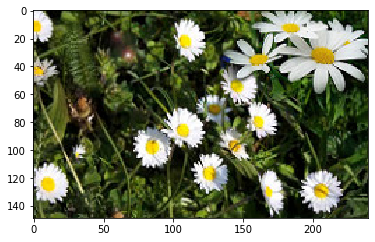

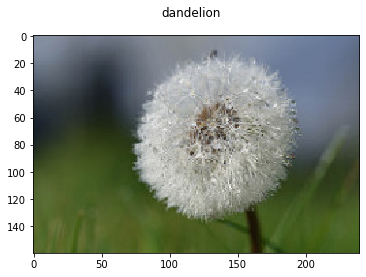

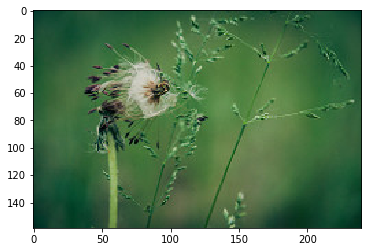

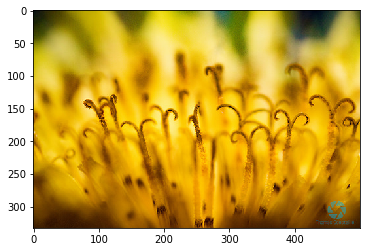

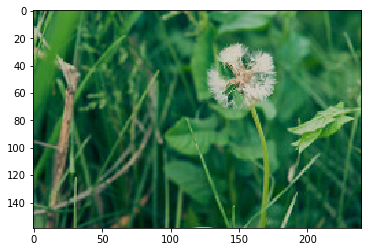

In [14]:
#Visualisasi data

import cv2
import matplotlib.pyplot as plt
import numpy as np

def vizualization(flowers_name,DIR):
    plt.suptitle(flowers_name)
    dir_name=os.listdir(DIR)
    for j in range(0,4):
        img = dir_name[j]
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        
vizualization('sunflower',sunflower_dir)
vizualization('daisy',daisy_dir)
vizualization('dandelion',dandelion_dir)

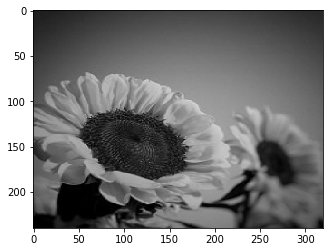

[31 31 31 ...  0  0  0]


In [29]:
#convert ke gray image

def grayImage(image):
    img = cv2.imread(image)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

    width = int(320)
    height = int(240)
    dim = (width, height)

    resized = cv2.resize(img_rgb, dim, interpolation = cv2.INTER_AREA)

    return resized

plt.imshow(grayImage('./flowers/sunflower/sunflo (1).jpg'))
plt.show()

print((grayImage('./flowers/sunflower/sunflo (1).jpg')).flatten())

In [6]:
#fungsi sigmoid
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

print(sigmoid(32))

0.9999999999999873


In [7]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [1]:
def transfer_derivative(output):
	return output * (1.0 - output)
 
# menghitung error backpropagation
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test error backpropagation
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0004931412394950468}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.0006117870374624608}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.004987375477930005}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [9]:
# backporopagation - Feedforward
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = sigmoid(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [2]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# test backpropagation of error
network = [[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}],
		[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095]}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763]}]]
expected = [0, 1, 1]
backward_propagate_error(network, expected)
for layer in network:
	print(layer)

# Update bobot
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0004931412394950468}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.0006117870374624608}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': -0.004987375477930005}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]
